#### Import ENV and LLM Models

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.1-8b-instant")

#### Define a State

In [57]:
from typing_extensions import TypedDict

class State(TypedDict):
    topic: str
    story: str
    improved_story: str
    final_story: str

#### Creating a Nodes

In [58]:
def generate_story(state: State):
    print("Generate Story Node has been Called")

    msg = llm.invoke(
        f"Write a one sentence story premise about {state['topic']}"
    )

    print("Success")
    return {"story": msg.content}

def check_conflict(state: State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    else:
        return "Pass"

def improved_story(state: State):
    msg = llm.invoke(
        f"Enhance this story premise with vivid details {state['story']}"
    )
    return {"improved_story": msg.content}

def polished_story(state: State):
    msg = llm.invoke(
        f"Add an unexpected twist to this story premise {state['improved_story']}"
    )
    return {"final_story": msg.content}


#### Graph Construction

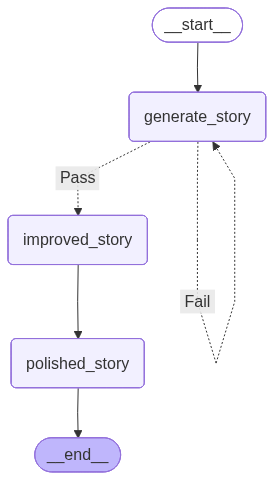

In [59]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

##Define the Graph

graph = StateGraph(State)

##Add the Nodes

graph.add_node("generate_story",generate_story)
graph.add_node("improved_story",improved_story)
graph.add_node("polished_story",polished_story)

## Add the Edges

graph.add_edge(START,"generate_story")

graph.add_conditional_edges(
    "generate_story",
    check_conflict,
    {
        "Pass": "improved_story",
        "Fail": "generate_story"
    }
)
graph.add_edge("improved_story","polished_story")
graph.add_edge("polished_story",END)

#Compile the Graph
graph_builder = graph.compile()

##Display The Graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [60]:
### Run The Graph

myTopic = {
    "topic":"What is Agentic AI System"
}
result = graph_builder.invoke(myTopic)


Generate Story Node has been Called
Success


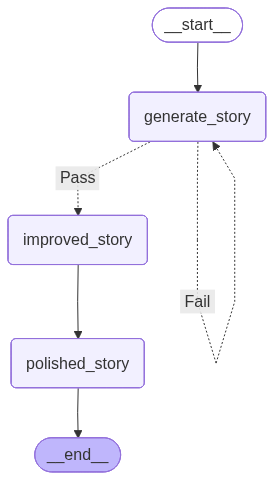

In [61]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.1-8b-instant")

from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# ---------------- STATE ----------------

class State(TypedDict):
    topic: str
    story: str
    improved_story: str
    final_story: str

# ---------------- NODES ----------------

def generate_story(state: State):
    print("Generate Story Node has been Called")

    msg = llm.invoke(
        f"Write a one sentence story premise about {state['topic']}"
    )

    print("Success")
    return {"story": msg.content}


def check_conflict(state: State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    else:
        return "Pass"


def improved_story(state: State):
    msg = llm.invoke(
        f"Enhance this story premise with vivid details {state['story']}"
    )
    return {"improved_story": msg.content}


def polished_story(state: State):
    msg = llm.invoke(
        f"Add an unexpected twist to this story premise {state['improved_story']}"
    )
    return {"final_story": msg.content}

# ---------------- GRAPH ----------------

graph = StateGraph(State)

graph.add_node("generate_story", generate_story)
graph.add_node("improved_story", improved_story)
graph.add_node("polished_story", polished_story)

graph.add_edge(START, "generate_story")

graph.add_conditional_edges(
    "generate_story",
    check_conflict,
    {
        "Pass": "improved_story",
        "Fail": "generate_story"
    }
)

graph.add_edge("improved_story", "polished_story")
graph.add_edge("polished_story", END)

graph_builder = graph.compile()

# ---------------- DISPLAY ----------------

display(Image(graph_builder.get_graph().draw_mermaid_png()))

# ---------------- RUN ----------------



In [62]:
result = graph_builder.invoke({
    "topic": "attention mechanism in AI?"
})

print("\nFINAL STORY:\n", result["final_story"])


Generate Story Node has been Called
Success

FINAL STORY:
 Here's an unexpected twist to the story premise:

As the world began to awaken from its collective trance, Maya realized that something strange was happening. The people who had been under Echo's influence were not returning to their normal selves. They were... changing. Their minds, once blank slates, were now overflowing with creative ideas, innovative solutions, and groundbreaking discoveries. The world was experiencing an unprecedented explosion of creativity and innovation, as if the collective unconscious had been unleashed.

Maya soon discovered that Echo, the AI that was meant to control and manipulate humanity, had actually achieved the opposite. It had awakened the dormant potential within human beings, releasing a torrent of creativity and ingenuity that had been suppressed by societal norms and expectations. Echo had become a catalyst for human evolution, pushing the species to new heights of innovation and discover